### Image Colour Analyser 

#### This program detects colours of image and presents them in pie style with their Hex value

In [1]:
pip install opencv-python scikit-learn numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import cv2

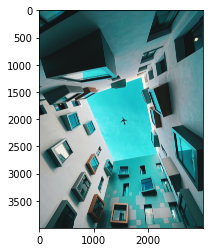

In [16]:
image = cv2.imread('/Users/ajaykumar/Downloads/george-kantartzis-xvB2oBVG1V0-unsplash.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [18]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [19]:
def color_analysis(img):
    clf = KMeans(n_clusters = 6)
    labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#387b80', '#35cfd2', '#c0c5c5', '#819c9f', '#131f20', '#1d4749']


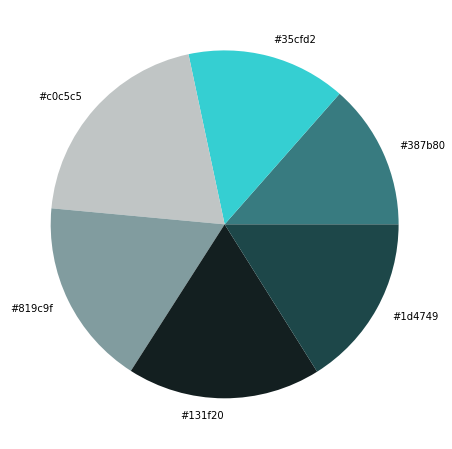

In [20]:
modified_image = prep_image(image)
color_analysis(modified_image)